In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [112]:
data = pd.read_csv("HV.csv")

Features and Target variables

In [113]:
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# For 3W Uncomment the below line
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','Bus','HCV','LCV','Total']].values

# For HV and LCV
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values

target = data['SD'].values

Normalize data

In [114]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [116]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [145]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/600
2/2 [==============================] - 1s 200ms/step - loss: 334.8282 - val_loss: 406.7552
Epoch 2/600
2/2 [==============================] - 0s 20ms/step - loss: 334.1743 - val_loss: 406.1086
Epoch 3/600
2/2 [==============================] - 0s 33ms/step - loss: 333.6277 - val_loss: 405.5266
Epoch 4/600
2/2 [==============================] - 0s 17ms/step - loss: 333.1415 - val_loss: 404.9421
Epoch 5/600
2/2 [==============================] - 0s 17ms/step - loss: 332.6159 - val_loss: 404.3030
Epoch 6/600
2/2 [==============================] - 0s 21ms/step - loss: 332.0402 - val_loss: 403.5760
Epoch 7/600
2/2 [==============================] - 0s 15ms/step - loss: 331.3989 - val_loss: 402.7242
Epoch 8/600
2/2 [==============================] - 0s 20ms/step - loss: 330.6090 - val_loss: 401.7013
Epoch 9/600
2/2 [==============================] - 0s 34ms/step - loss: 329.6819 - val_loss: 400.4377
Epoch 10/600
2/2 [==============================] - 0s 30ms/step - loss: 328.5560

Visualize LSTM results

0.6216306290972144


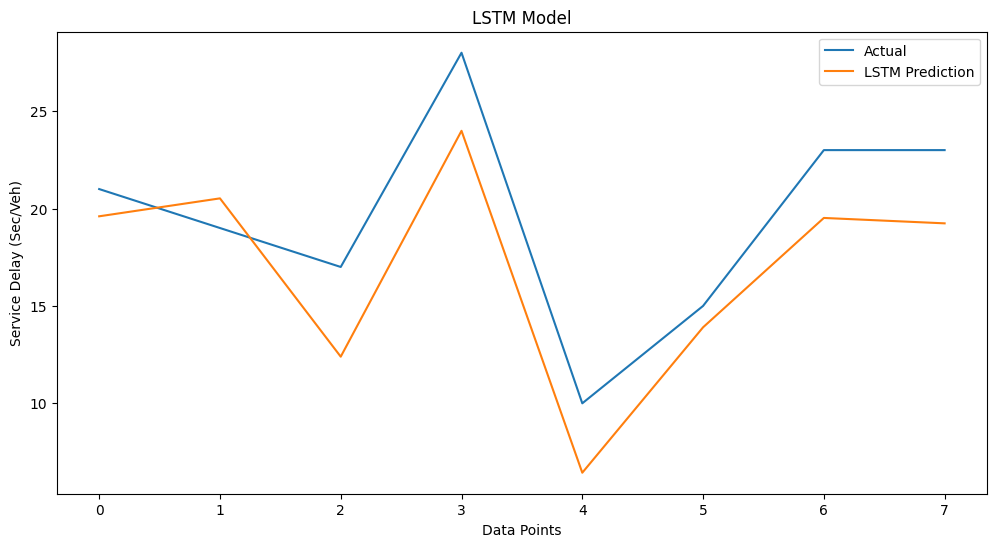

In [147]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [119]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
2/2 [==============================] - 3s 470ms/step - loss: 333.9980 - val_loss: 404.9623
Epoch 2/800
2/2 [==============================] - 0s 24ms/step - loss: 332.4071 - val_loss: 403.0201
Epoch 3/800
2/2 [==============================] - 0s 33ms/step - loss: 330.7263 - val_loss: 400.7578
Epoch 4/800
2/2 [==============================] - 0s 31ms/step - loss: 328.6747 - val_loss: 397.8662
Epoch 5/800
2/2 [==============================] - 0s 18ms/step - loss: 326.0717 - val_loss: 394.0731
Epoch 6/800
2/2 [==============================] - 0s 16ms/step - loss: 322.5944 - val_loss: 389.0293
Epoch 7/800
2/2 [==============================] - 0s 18ms/step - loss: 317.8539 - val_loss: 382.1952
Epoch 8/800
2/2 [==============================] - 0s 33ms/step - loss: 311.5406 - val_loss: 372.7088
Epoch 9/800
2/2 [==============================] - 0s 17ms/step - loss: 302.8718 - val_loss: 359.1786
Epoch 10/800
2/2 [==============================] - 0s 17ms/step - loss: 290.7780

Visualize BiLSTM results

0.7930516713411222


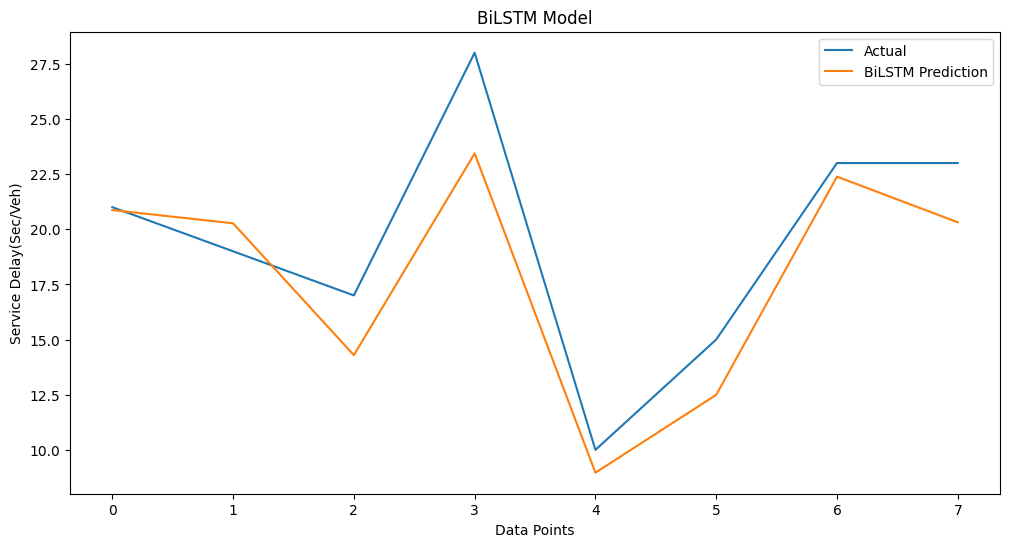

In [146]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [138]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/500
2/2 [==============================] - 2s 267ms/step - loss: 333.9149 - val_loss: 404.6649
Epoch 2/500
2/2 [==============================] - 0s 34ms/step - loss: 332.0850 - val_loss: 402.4739
Epoch 3/500
2/2 [==============================] - 0s 17ms/step - loss: 330.2545 - val_loss: 400.0340
Epoch 4/500
2/2 [==============================] - 0s 38ms/step - loss: 328.0972 - val_loss: 397.4044
Epoch 5/500
2/2 [==============================] - 0s 28ms/step - loss: 325.8641 - val_loss: 394.3756
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 323.0769 - val_loss: 390.8018
Epoch 7/500
2/2 [==============================] - 0s 28ms/step - loss: 319.8127 - val_loss: 386.4474
Epoch 8/500
2/2 [==============================] - 0s 26ms/step - loss: 315.8370 - val_loss: 381.0517
Epoch 9/500
2/2 [==============================] - 0s 28ms/step - loss: 310.8492 - val_loss: 374.1584
Epoch 10/500
2/2 [==============================] - 0s 19ms/step - loss: 304.7045

Visualize GRU results

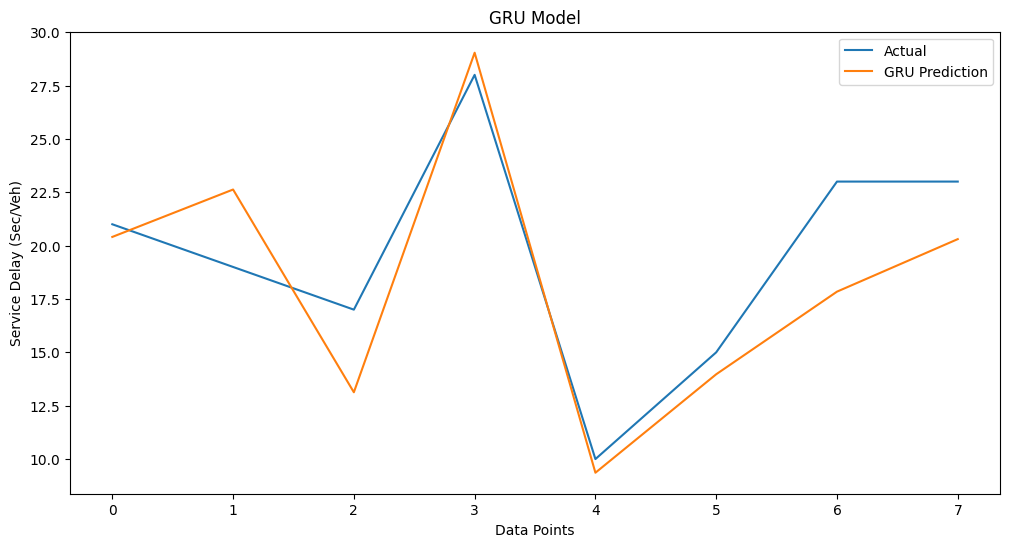

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [123]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
2/2 [==============================] - 3s 650ms/step - loss: 334.3660 - val_loss: 404.0857
Epoch 2/800
2/2 [==============================] - 0s 23ms/step - loss: 331.3069 - val_loss: 400.4800
Epoch 3/800
2/2 [==============================] - 0s 15ms/step - loss: 328.1348 - val_loss: 396.5107
Epoch 4/800
2/2 [==============================] - 0s 33ms/step - loss: 324.6591 - val_loss: 391.8487
Epoch 5/800
2/2 [==============================] - 0s 41ms/step - loss: 320.6729 - val_loss: 386.2639
Epoch 6/800
2/2 [==============================] - 0s 26ms/step - loss: 315.6143 - val_loss: 379.4472
Epoch 7/800
2/2 [==============================] - 0s 33ms/step - loss: 309.2732 - val_loss: 370.9200
Epoch 8/800
2/2 [==============================] - 0s 33ms/step - loss: 301.4861 - val_loss: 360.0416
Epoch 9/800
2/2 [==============================] - 0s 26ms/step - loss: 291.5469 - val_loss: 345.9120
Epoch 10/800
2/2 [==============================] - 0s 33ms/step - loss: 278.6725

Visualize BiGRU results

0.8050950055438298


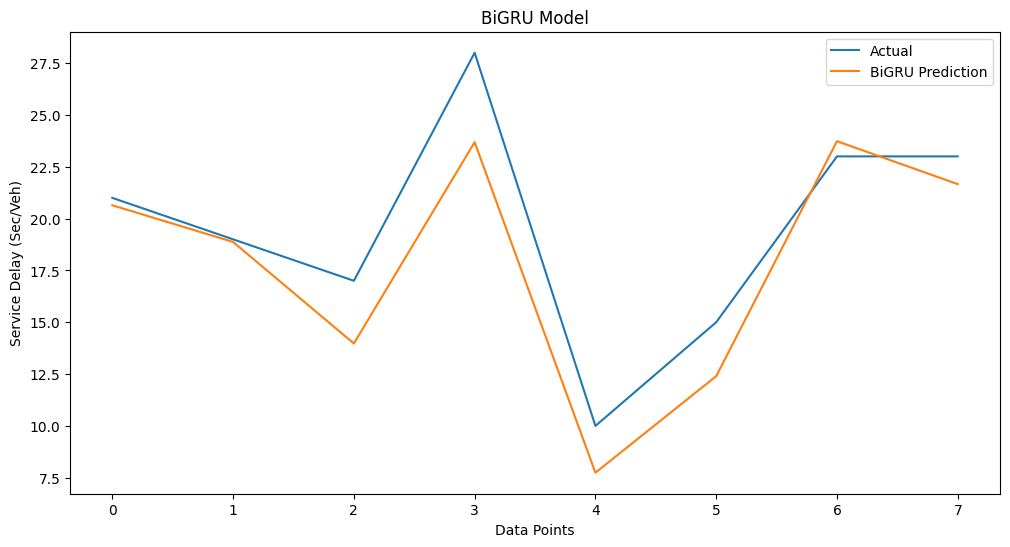

In [124]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [125]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
2/2 [==============================] - 1s 130ms/step - loss: 331.3809 - val_loss: 398.8784
Epoch 2/800
2/2 [==============================] - 0s 49ms/step - loss: 327.0705 - val_loss: 393.4323
Epoch 3/800
2/2 [==============================] - 0s 38ms/step - loss: 322.3312 - val_loss: 387.9033
Epoch 4/800
2/2 [==============================] - 0s 46ms/step - loss: 317.9312 - val_loss: 381.9744
Epoch 5/800
2/2 [==============================] - 0s 33ms/step - loss: 312.6004 - val_loss: 375.4612
Epoch 6/800
2/2 [==============================] - 0s 38ms/step - loss: 306.8744 - val_loss: 368.2282
Epoch 7/800
2/2 [==============================] - 0s 29ms/step - loss: 300.6337 - val_loss: 360.1844
Epoch 8/800
2/2 [==============================] - 0s 55ms/step - loss: 293.6440 - val_loss: 351.2352
Epoch 9/800
2/2 [==============================] - 0s 17ms/step - loss: 285.9842 - val_loss: 341.3248
Epoch 10/800
2/2 [==============================] - 0s 25ms/step - loss: 277.3669

Visualize CNN results

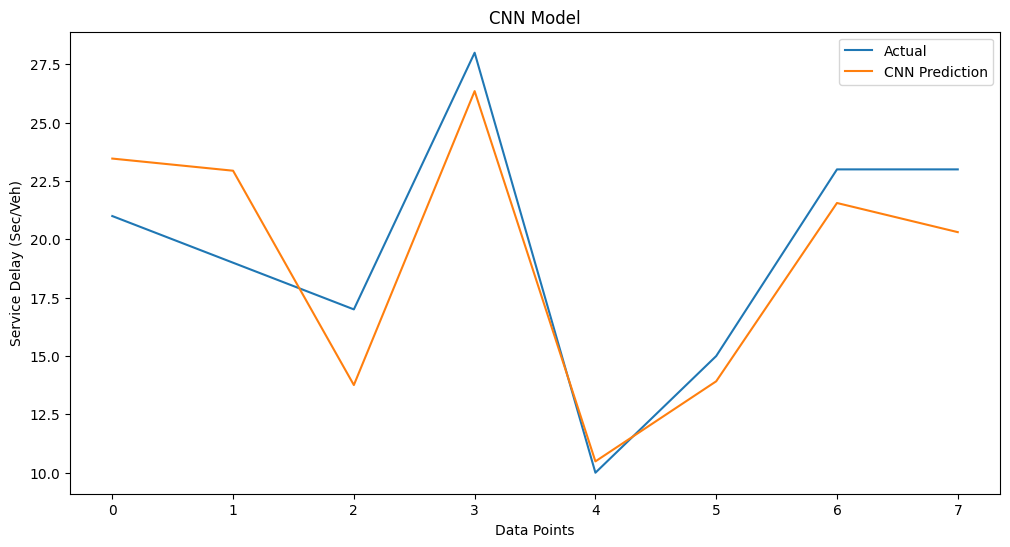

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [127]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
2/2 [==============================] - 1s 173ms/step - loss: 335.1766 - val_loss: 406.5679
Epoch 2/800
2/2 [==============================] - 0s 16ms/step - loss: 333.8615 - val_loss: 404.9944
Epoch 3/800
2/2 [==============================] - 0s 32ms/step - loss: 332.5691 - val_loss: 403.4252
Epoch 4/800
2/2 [==============================] - 0s 31ms/step - loss: 331.2956 - val_loss: 401.8106
Epoch 5/800
2/2 [==============================] - 0s 31ms/step - loss: 329.9575 - val_loss: 400.0379
Epoch 6/800
2/2 [==============================] - 0s 16ms/step - loss: 328.3814 - val_loss: 398.0447
Epoch 7/800
2/2 [==============================] - 0s 24ms/step - loss: 326.7286 - val_loss: 395.7918
Epoch 8/800
2/2 [==============================] - 0s 33ms/step - loss: 324.8799 - val_loss: 393.2025
Epoch 9/800
2/2 [==============================] - 0s 16ms/step - loss: 322.6317 - val_loss: 390.1549
Epoch 10/800
2/2 [==============================] - 0s 47ms/step - loss: 319.9995

Visualize CNN_LSTM results

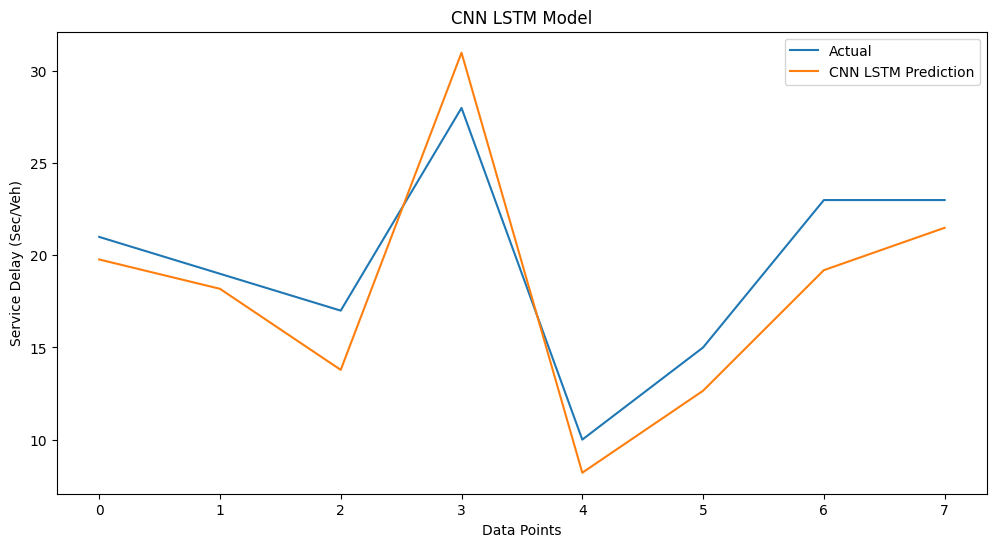

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [129]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
2/2 [==============================] - 2s 996ms/step - loss: 334.6808 - val_loss: 405.2891
Epoch 2/800
2/2 [==============================] - 0s 16ms/step - loss: 332.5479 - val_loss: 402.7948
Epoch 3/800
2/2 [==============================] - 0s 31ms/step - loss: 330.5729 - val_loss: 400.3477
Epoch 4/800
2/2 [==============================] - 0s 32ms/step - loss: 328.6124 - val_loss: 397.7847
Epoch 5/800
2/2 [==============================] - 0s 32ms/step - loss: 326.4171 - val_loss: 394.8863
Epoch 6/800
2/2 [==============================] - 0s 31ms/step - loss: 323.9922 - val_loss: 391.5264
Epoch 7/800
2/2 [==============================] - 0s 16ms/step - loss: 321.0894 - val_loss: 387.5417
Epoch 8/800
2/2 [==============================] - 0s 14ms/step - loss: 317.5407 - val_loss: 382.6851
Epoch 9/800
2/2 [==============================] - 0s 16ms/step - loss: 313.3926 - val_loss: 376.6370
Epoch 10/800
2/2 [==============================] - 0s 31ms/step - loss: 308.0997

Visualize CNN_BiLSTM results

0.8379229778793329


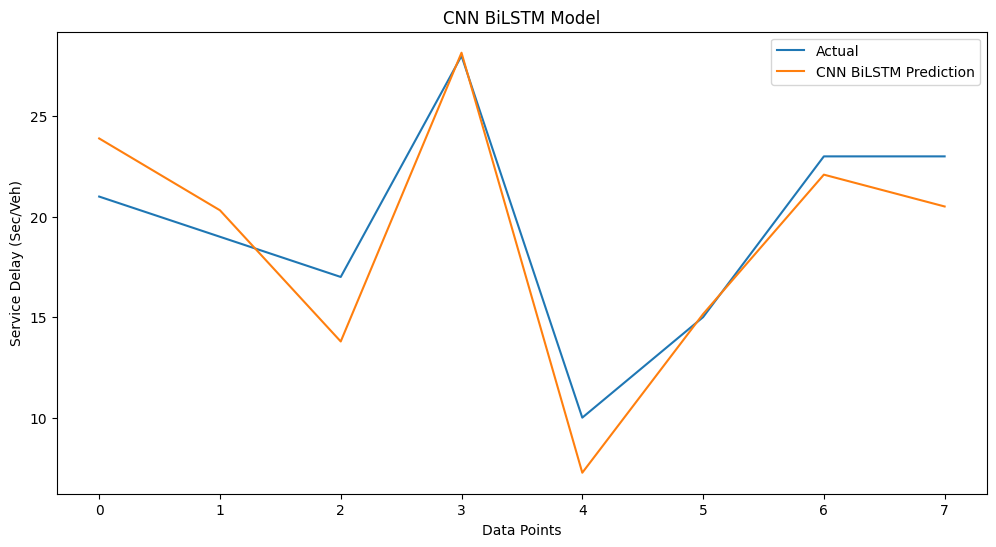

In [130]:
print(r2_cnn_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [148]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

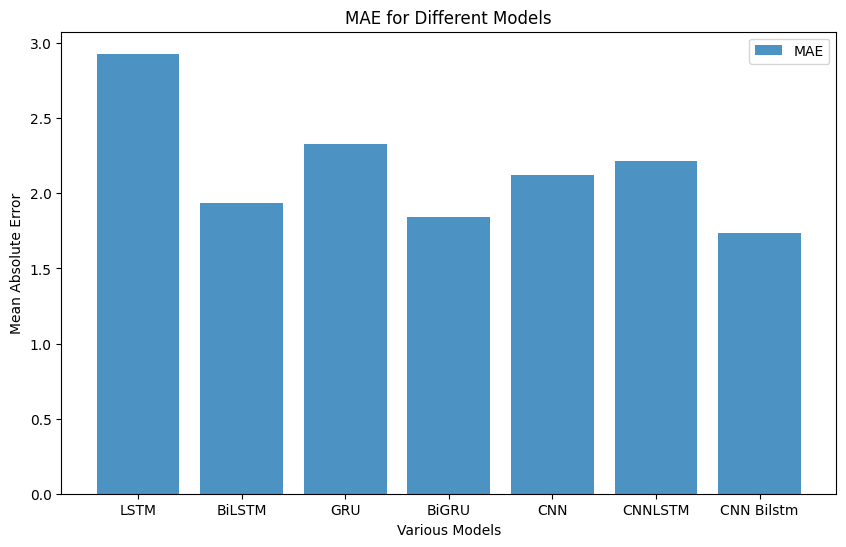

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

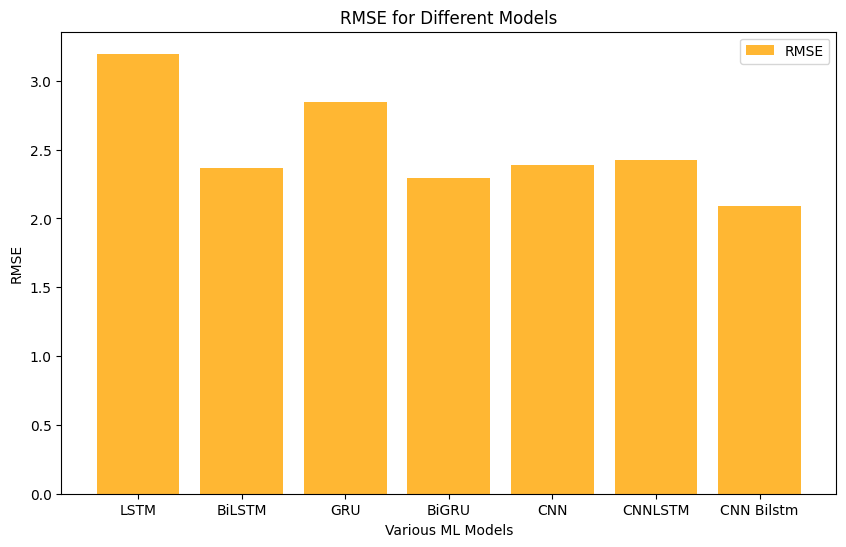

In [150]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

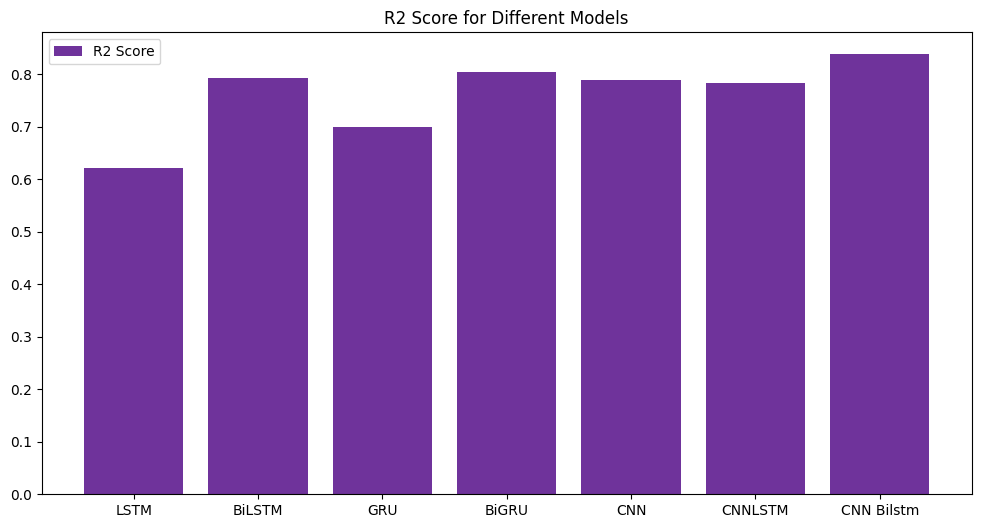

In [151]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [152]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 2.9299439191818237
LSTM MSE: 3.1962435786990966
LSTM R2 Score: 0.6216306290972144

BiLSTM MAE: 1.9387356042861938
BiLSTM MSE: 2.363811514014961
BiLSTM R2 Score: 0.7930516713411222

GRU MAE: 2.3311245441436768
GRU MSE: 2.848234941163025
GRU R2 Score: 0.6995391748125207

BiGRU MAE: 1.8442726135253906
BiGRU MSE: 2.2939997494151116
BiGRU R2 Score: 0.8050950055438298

CNN MAE: 2.124017834663391
CNN MSE: 2.3862309191869935
CNN R2 Score: 0.789107481493185

CNN LSTM MAE: 2.2133827209472656
CNN LSTM MSE: 2.4229824951740775
CNN LSTM R2 Score: 0.782561326965926

CNN BiLSTM MAE: 1.734325647354126
CNN BiLSTM MSE: 2.091908123522162
CNN BiLSTM R2 Score: 0.8379229778793329


Plot predictions for each model

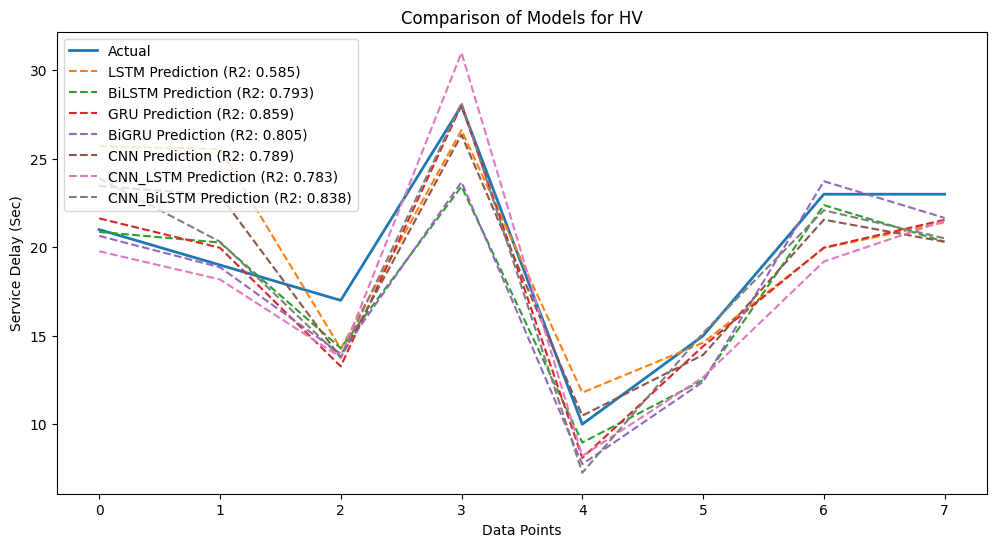

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for HV')
plt.show()

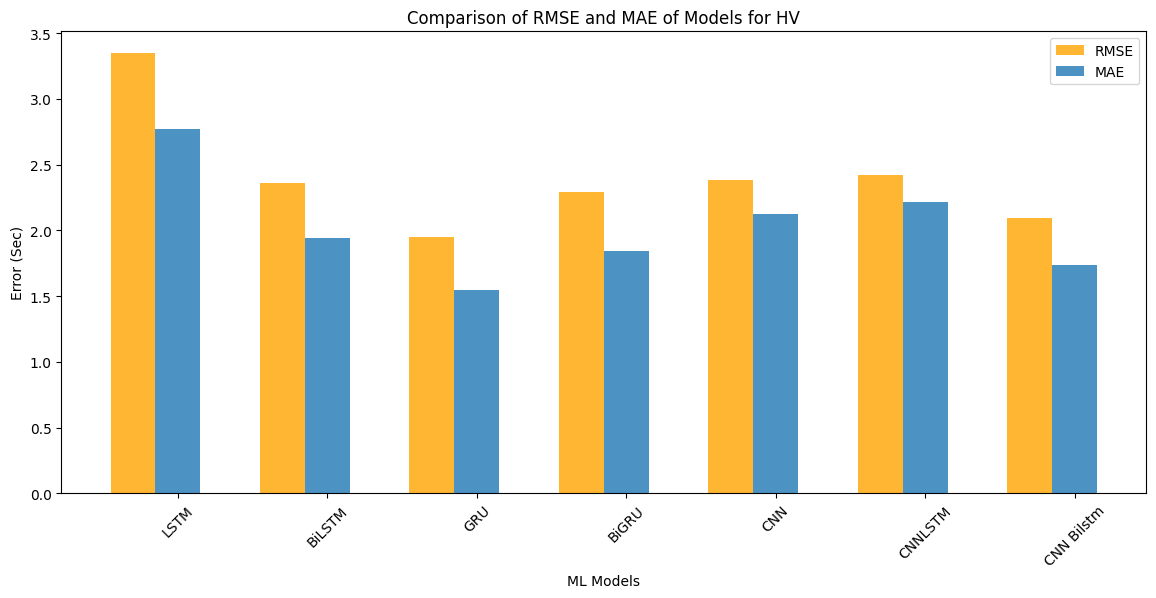

In [137]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for HV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()